In [1]:
import sys
sys.path.append('..')
from ift6758.features import games_to_table, team_side, distance
import pandas as pd
pd.set_option('display.max_columns', None)
import wandb
import os
import json
from tqdm import tqdm

USE_CACHE = True

In [13]:
if not USE_CACHE:
    df = pd.DataFrame(games_to_table(list(range(2016, 2024))))
    df.to_csv("../ift6758/data/preprocessed_data/preprocessed_game_data_2016_to_2023.csv")
else:
    df = pd.read_csv("../ift6758/data/preprocessed_data/preprocessed_game_data_2016_to_2023.csv")


C:\Users\dre\AppData\Local\Temp\ipykernel_50488\2579115068.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../ift6758/data/preprocessed_data/preprocessed_game_data_2016_to_2023.csv")


In [20]:
df

,Unnamed: 0,eventId,timeInPeriod,periodDescriptor_number,homeTeamDefendingSide,xCoord,yCoord,eventOwnerTeamId,shootingPlayerId,goalieInNetId,shotType,zoneCode,id,gameDate,season,homeTeam_abbrev,homeTeam_score,awayTeam_abbrev,awayTeam_score,awayTeam_id,homeTeam_id,type,scoringPlayerId
0,0,8,01:11,1,left,-77.0,5.0,10,8478483.0,8467950.0,wrist,O,2016020001,2016-10-12,20162017,OTT,5,TOR,4,10,9,ShotOnGoal,NaN
1,1,11,02:53,1,left,86.0,13.0,9,8467967.0,8475883.0,wrist,O,2016020001,2016-10-12,20162017,OTT,5,TOR,4,10,9,ShotOnGoal,NaN
2,2,15,04:01,1,left,23.0,-38.0,9,8476879.0,8475883.0,wrist,N,2016020001,2016-10-12,20162017,OTT,5,TOR,4,10,9,ShotOnGoal,NaN
3,3,16,04:46,1,left,33.0,-15.0,9,8474578.0,8475883.0,slap,O,2016020001,2016-10-12,20162017,OTT,5,TOR,4,10,9,ShotOnGoal,NaN
4,4,24,06:46,1,left,-34.0,28.0,10,8475716.0,8467950.0,wrist,O,2016020001,2016-10-12,20162017,OTT,5,TOR,4,10,9,ShotOnGoal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604351,604351,935,09:00,3,right,-73.0,-27.0,26,8476479.0,8482821.0,wrist,O,2023021312,2024-04-18,20232024,LAK,5,CHI,4,16,26,ShotOnGoal,NaN
604352,604352,971,12:41,3,right,-74.0,-21.0,26,8482124.0,8482821.0,wrist,O,2023021312,2024-04-18,20232024,LAK,5,CHI,4,16,26,ShotOnGoal,NaN
604353,604353,1024,17:28,3,right,-27.0,-27.0,26,8478882.0,8482821.0,slap,O,2023021312,2024-04-18,20232024,LAK,5,CHI,4,16,26,ShotOnGoal,NaN
604354,604354,1039,18:39,3,right,-74.0,8.0,26,NaN,8482821.0,wrist,O,2023021312,2024-04-18,20232024,LAK,5,CHI,4,16,26,Goal,8478042.0


# compute home team defending side

In [3]:
if not USE_CACHE:
    home_team_defending_side_dict = {}
    home_team_defending_side_mismatches = []
    home_team_defending_side_not_found = []

    for game_id in tqdm(df['id'].unique()):
        for period_number in df[df['id'] == game_id]['periodDescriptor_number'].unique():
            team_side.populate_home_team_defending_side(game_id, period_number, df, home_team_defending_side_dict, home_team_defending_side_mismatches, home_team_defending_side_not_found)
    df = team_side.update_home_team_defending_side(df, home_team_defending_side_dict)
    df.to_csv("../ift6758/data/preprocessed_data/preprocessed_game_data__regular_season_2016_to_2023_team_side.csv", index=False)
else:
    df = pd.read_csv("../ift6758/data/preprocessed_data/preprocessed_game_data__regular_season_2016_to_2023_team_side.csv")

In [ ]:
home_team_defending_side_mismatches # likely errors in data, because only 10 mismatches over 600k events

[(2019020019, 4),
 (2019020249, 1),
 (2019020249, 2),
 (2019020249, 3),
 (2019020256, 1),
 (2019020256, 2),
 (2019020256, 3),
 (2019020267, 2),
 (2019020408, 2),
 (2020020175, 3)]

In [ ]:
home_team_defending_side_not_found # todo: fill in manually


[(2017020533, 5)]

# compute distance

In [4]:
df['distance_from_goal'] = df.apply(distance.compute_distance, axis=1)
df


,Unnamed: 0,eventId,timeInPeriod,periodDescriptor_number,homeTeamDefendingSide,xCoord,yCoord,eventOwnerTeamId,shootingPlayerId,goalieInNetId,shotType,zoneCode,id,gameDate,season,homeTeam_abbrev,homeTeam_score,awayTeam_abbrev,awayTeam_score,awayTeam_id,homeTeam_id,type,scoringPlayerId,distance_from_goal
0,0,8,01:11,1,left,-77.0,5.0,10,8478483.0,8467950.0,wrist,O,2016020001,2016-10-12,20162017,OTT,5,TOR,4,10,9,ShotOnGoal,NaN,13.000000
1,1,11,02:53,1,left,86.0,13.0,9,8467967.0,8475883.0,wrist,O,2016020001,2016-10-12,20162017,OTT,5,TOR,4,10,9,ShotOnGoal,NaN,13.341664
2,2,15,04:01,1,left,23.0,-38.0,9,8476879.0,8475883.0,wrist,N,2016020001,2016-10-12,20162017,OTT,5,TOR,4,10,9,ShotOnGoal,NaN,76.157731
3,3,16,04:46,1,left,33.0,-15.0,9,8474578.0,8475883.0,slap,O,2016020001,2016-10-12,20162017,OTT,5,TOR,4,10,9,ShotOnGoal,NaN,57.974132
4,4,24,06:46,1,left,-34.0,28.0,10,8475716.0,8467950.0,wrist,O,2016020001,2016-10-12,20162017,OTT,5,TOR,4,10,9,ShotOnGoal,NaN,61.717096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604351,604351,935,09:00,3,right,-73.0,-27.0,26,8476479.0,8482821.0,wrist,O,2023021312,2024-04-18,20232024,LAK,5,CHI,4,16,26,ShotOnGoal,NaN,31.384710
604352,604352,971,12:41,3,right,-74.0,-21.0,26,8482124.0,8482821.0,wrist,O,2023021312,2024-04-18,20232024,LAK,5,CHI,4,16,26,ShotOnGoal,NaN,25.806976
604353,604353,1024,17:28,3,right,-27.0,-27.0,26,8478882.0,8482821.0,slap,O,2023021312,2024-04-18,20232024,LAK,5,CHI,4,16,26,ShotOnGoal,NaN,67.623960
604354,604354,1039,18:39,3,right,-74.0,8.0,26,NaN,8482821.0,wrist,O,2023021312,2024-04-18,20232024,LAK,5,CHI,4,16,26,Goal,8478042.0,17.000000


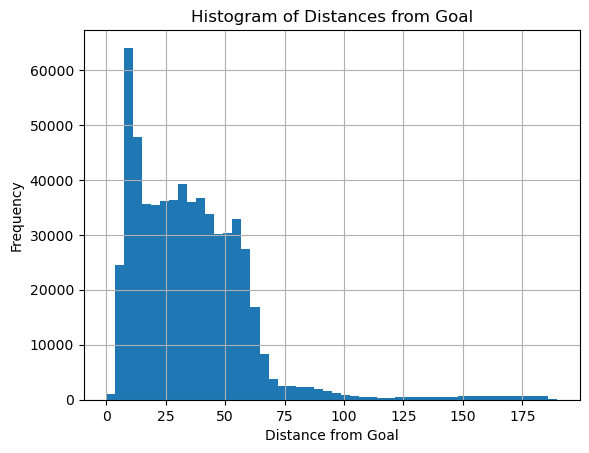

In [5]:
distance.plot_histogram(df)


# upload to wandb

In [6]:
api_key = os.getenv("WANDB_API_KEY") # requires wandb API key in WANDB_API_KEY environment variable
with wandb.init(project="IFT6758-2024-B05", job_type="load-data", config={"seasons": "2016-2023"}, tags=["team_side", "regular_season", "distance_from_goal"]) as run:

    artifact = wandb.Artifact('shot_events', type='dataset', description='regular 2016-2023 seasons data with team side')
    table_2016_2017 = wandb.Table(dataframe=df[df["season"] == 20162017])
    artifact.add(table_2016_2017, '2016-2017')

    table_2017_2018 = wandb.Table(dataframe=df[df["season"] == 20172018])
    artifact.add(table_2017_2018, '2017-2018')

    table_2018_2019 = wandb.Table(dataframe=df[df["season"] == 20182019])
    artifact.add(table_2018_2019, '2018-2019')

    table_2019_2020 = wandb.Table(dataframe=df[df["season"] == 20192020])
    artifact.add(table_2019_2020, '2019-2020')

    table_2020_2021 = wandb.Table(dataframe=df[df["season"] == 20202021])
    artifact.add(table_2020_2021, '2020-2021')

    table_2021_2022 = wandb.Table(dataframe=df[df["season"] == 20212022])
    artifact.add(table_2021_2022, '2021-2022')

    table_2022_2023 = wandb.Table(dataframe=df[df["season"] == 20222023])
    artifact.add(table_2022_2023, '2022-2023')

    table_2023_2024 = wandb.Table(dataframe=df[df["season"] == 20232024])
    artifact.add(table_2023_2024, '2023-2024')
    
    run.log_artifact(artifact)



wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: andre-diler (IFT6758-2024-B05). Use `wandb login --relogin` to force relogin


# Sanity checks

In [4]:
df[df.duplicated()]

,Unnamed: 0,eventId,timeInPeriod,periodDescriptor_number,homeTeamDefendingSide,xCoord,yCoord,eventOwnerTeamId,shootingPlayerId,goalieInNetId,shotType,zoneCode,id,gameDate,season,homeTeam_abbrev,homeTeam_score,awayTeam_abbrev,awayTeam_score,awayTeam_id,homeTeam_id,type,scoringPlayerId


In [ ]:
unique_event_types = df['type'].unique()
unique_event_types

In [ ]:
events_with_no_zone_code = df[df['zoneCode'].isna()]
events_with_no_zone_code

In [ ]:
events_with_no_shot_type = df[df['shotType'].isna()]
events_with_no_shot_type

In [ ]:
events_with_no_goalie = df[df['goalieInNetId'].isna()]
events_with_no_goalie # net empty of no goalie ?

In [ ]:
# errors ?
events_with_no_x_coord = df[df['xCoord'].isna()]
events_with_no_x_coord

In [ ]:
events_with_no_y_coord = df[df['yCoord'].isna()]
events_with_no_y_coord